# Transformação de imagens

Verificando versão instalada do OpenCV

In [1]:
import cv2
print(cv2.__version__)

import numpy as np

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

plt.style.use('seaborn')

3.4.3


## Sharpening (Aguçamento)

É uma operação que torna mais evidente e claro os detalhes de uma imagem, especialmente suas bordas.

In [141]:
image = cv2.imread("imagens/eiffel.jpg")

cv2.imshow("Eiffel", image)
cv2.waitKey()

113

In [143]:
filter_sharpening = np.array([[-1,-1,-1], [-1, 9, -1], [-1, -1, -1]])
image_sharpening = cv2.filter2D(image, -1, filter_sharpening)

cv2.imshow("Eiffel Sharpening", image_sharpening)
cv2.waitKey()

cv2.destroyAllWindows()

## Thresholding (Limiarização)

Técnicas de filtragem na imagem para remover ruídos ou regiões de interesse baseado no limiar de intensidade dos pixels.
Somente é permitido imagems em escala de cinza.

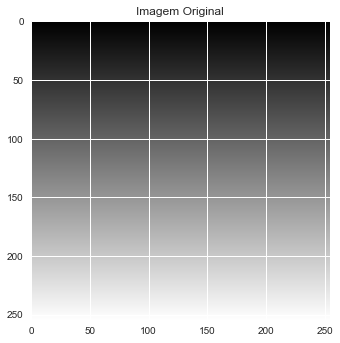

In [62]:
image = cv2.imread("imagens/gradiente.png")
plt.title("Imagem Original")
plt.imshow(image)
plt.show()

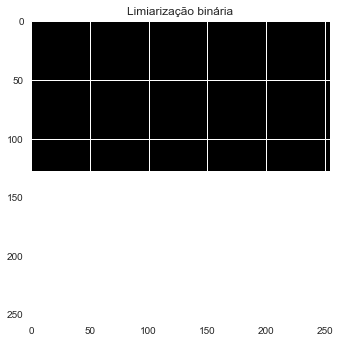

In [71]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.title("Limiarização binária")
plt.imshow(t_image)
plt.show()

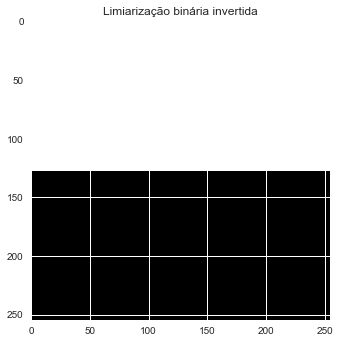

In [69]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
plt.title("Limiarização binária invertida")
plt.imshow(t_image)
plt.show()

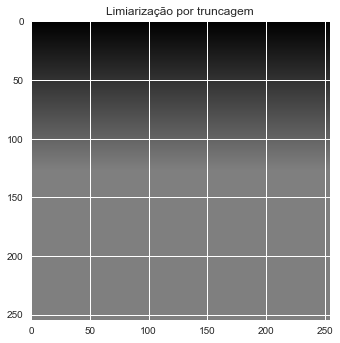

In [68]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
plt.title("Limiarização por truncagem")
plt.imshow(t_image)
plt.show()

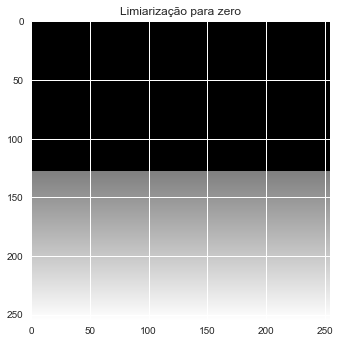

In [66]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
plt.title("Limiarização para zero")
plt.imshow(t_image)
plt.show()

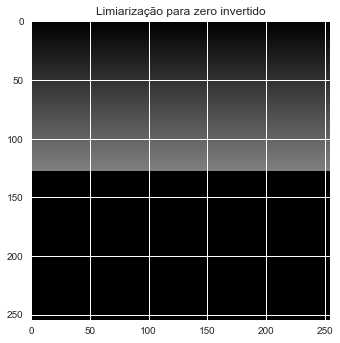

In [67]:
ret, t_image = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
plt.title("Limiarização para zero invertido")
plt.imshow(t_image)
plt.show()

### Limiar adaptativo

Este tipo de limiar é mais suave e obtem melhores resultados particularmente em operações voltadas a documentos para etapas de OCR. 
A característica de adaptividade permite que o efeito do limiar leve em consideração aspectos internos da imagem e não seja penas um filtro que ignora toda informação em função dos limiares configurados.

In [72]:
image = cv2.imread("imagens/sudoku.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Document Original", image)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1800x720 with 0 Axes>

In [73]:
ret, t_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("Document Binary Threshold", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1800x720 with 0 Axes>

In [74]:
image_blur = cv2.GaussianBlur(image, (5,5), 0)

cv2.imshow("Document Blurred", image_blur)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1800x720 with 0 Axes>

In [75]:
ret, t_image = cv2.threshold(image_blur, 90, 255, cv2.THRESH_BINARY)

cv2.imshow("Document Blurred and Threshold", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1800x720 with 0 Axes>

In [76]:
t_image = cv2.adaptiveThreshold(image_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
figure(figsize=(25,10))

cv2.imshow("Document Adaptative Filter", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

<Figure size 1800x720 with 0 Axes>

## Erosão e Dilatação

São operações morfológicas que visam restarurar informação na imagem aplicando operações que podem, por exemplo, completar pixels adjacentes ou removê-los.

Quando trabalhamos com OCR em imagens obtidas de scanners ou placas de veículos de automóveis, dada a qualidade da captura destas imagens nem sempre é preservad a informação com mesma nitidez o suficiente para algoritmos de OCR (como o _Tesseract_) identificarem os carcteres adequadamente.

In [5]:
image = cv2.imread("imagens/lanes.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Lanes", image)
cv2.waitKey()
cv2.destroyAllWindows()

image_blur = cv2.GaussianBlur(image, (5,5), 0)
ret, t_image = cv2.threshold(image_blur, 200, 255, cv2.THRESH_BINARY)

cv2.imshow("Document Blurred and Threshold", t_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
kernel = np.ones((5,5), np.uint8)
image_dilated = cv2.dilate(t_image, kernel, iterations=1)

cv2.imshow("Lanes Dilated", image_dilated)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
kernel = np.ones((5,5), np.uint8)
image_eroded = cv2.erode(image_dilated, kernel, iterations=1)

cv2.imshow("Lanes Eroded", image_eroded)
cv2.waitKey()
cv2.destroyAllWindows()

## Detecção de bordas

Os operações de detecção de bordas é o primeiro passo para segmentação de imagens, pois torna possível identificar objetos.
Existem diversas formas de detectar bordas, das quais a que mais se destaca é o método de Canny.

In [98]:
image = cv2.imread("imagens/thanos2.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Thanos", image)
cv2.waitKey()
cv2.destroyAllWindows()

### Método Sobel

In [99]:
image_blur = cv2.GaussianBlur(image,(3,3),0)

sobel_x = cv2.Sobel(image_blur, cv2.CV_64F, 1, 0, ksize=3, delta=0)
sobel_y = cv2.Sobel(image_blur, cv2.CV_64F, 0, 1, ksize=3, delta=0)

abs_grad_x = cv2.convertScaleAbs(sobel_x)

cv2.imshow("Thanos Sobel X", abs_grad_x)
cv2.waitKey()

abs_grad_y = cv2.convertScaleAbs(sobel_y)

cv2.imshow("Thanos Sobel Y", abs_grad_y)
cv2.waitKey()

sobel_xy = cv2.bitwise_or(abs_grad_x, abs_grad_y)

cv2.imshow("Thanos Sobel XY", sobel_xy)
cv2.waitKey()

cv2.destroyAllWindows()

In [101]:
laplacian = cv2.Laplacian(image_blur, cv2.CV_16S, 3, scale=5)

abs_grad = cv2.convertScaleAbs(laplacian)

cv2.imshow("Thanos Laplacian", abs_grad)
cv2.waitKey()
cv2.destroyAllWindows()

### Método Canny

In [23]:
canny = cv2.Canny(image_blur, 30, 190)
cv2.imshow("Thanos Canny", canny)
cv2.waitKey()

canny = cv2.Canny(image, 70, 150)
cv2.imshow("Thanos Canny Grayscale", canny)
cv2.waitKey()
cv2.destroyAllWindows()

# Segmentação de imagens

Técnicas para identificação de objetos e formas.

## Contornos (*contours*)

O primeiro passo para identificar contornos de objetos em imagens é aplicando operações de identificação de contornos.

In [36]:
image = cv2.imread("imagens/formas_1.png")
print(image.shape)

cv2.imshow("Formas 1", image)
cv2.waitKey()
cv2.destroyAllWindows()

(300, 300, 3)


In [37]:
image_grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image_grayscale, 30, 180)
cv2.imshow("Formas 1 Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
_, contours, hierarchy = cv2.findContours(image_edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))

cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2.imshow("Formas 1 Contours", image)
cv2.waitKey()
cv2.destroyAllWindows()

Contornos encontrados 3


Utilizando formas abertas.



In [40]:
image = cv2.imread("imagens/formas_2.png")
print(image.shape)

cv2.imshow("Formas 2", image)
cv2.waitKey()
cv2.destroyAllWindows()

(300, 300, 3)


In [41]:
image_grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image_grayscale, 50, 150)

cv2.imshow("Formas 2 Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

In [42]:
_, contours, hierarchy = cv2.findContours(image_edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))

for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    area = int(w) * int(h)
    print("Contorno " + str(idx) + " " + str(area))

image_contour = image.copy()
cv2.drawContours(image_contour, contours, -1, (0,255,0), 2)
cv2.imshow("Formas 2 Contours", image_contour)
cv2.waitKey()
cv2.destroyAllWindows()

Contornos encontrados 10
Contorno 0 5600
Contorno 1 5600
Contorno 2 3220
Contorno 3 3220
Contorno 4 3000
Contorno 5 3000
Contorno 6 26818
Contorno 7 26818
Contorno 8 11270
Contorno 9 11270


Os contornos adicionais encontrados são referentes a possíveis ruídos na imagem e na forma que os contornos são identificados. Há formas de conhecer melhor cada contorno e verificar se pode ser desconsiderado.

### Ordenando Contornos

Assim como foi mostrado anteriormente, podemos trabalhar com as informações de contorno para determinar aspectos como área e posição que auxiliam no processo de remoção de ruídos.

In [60]:
image = cv2.imread("imagens/shapes.jpg")
print(image.shape)

cv2.imshow("Formas Diversas", image)
cv2.waitKey()
cv2.destroyAllWindows()

(392, 392, 3)


In [61]:
blank_canvas = np.zeros((image.shape[0], image.shape[1], 3))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image, 40, 180)

cv2.imshow("Formas Diversas Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

In [62]:
_, contours, hierarchy = cv2.findContours(image_edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))

cv2.drawContours(blank_canvas, contours, -1, (0,255,0), 2)
cv2.imshow("Formas Diversas Blank Contours", blank_canvas)
cv2.waitKey()
cv2.destroyAllWindows()

Contornos encontrados 8


In [41]:
image_countor = image.copy()
cv2.drawContours(image_countor, contours, -1, (0,255,0), 2)
cv2.imshow("Formas Diversas Contours", image_countor)
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
def areas_contornos(contornos):
    areas = []
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        areas.append(area)
    return areas

In [39]:
areas_contornos(contours)

[4680.0, 100.0, 0.0, 5829.5, 4236.5, 0.5, 87.0, 4851.0]

Aqui percebemos áreas bem pequenas como 0,5 e 0,0 que caracterizam ruído. Neste caso podemos fazer uma limpeza nestes contornos para eliminar estes casos.
Para este exemplo vamos arbitrar que somente áreas maiores do que 1 sejam consideradas.

In [34]:
areas_contornos(contours)
contornos_cleaned = []

for contorno in contours:
    if cv2.contourArea(contorno) > 1:
        contornos_cleaned.append(contorno)
    
len(contours), len(contornos_cleaned)

(8, 6)

Na análise visual, agora o número de contornos identificados batem.

A função a seguir vai localizar o centróide de cada objeto na imagem para colocarmos um determinado texto. Este texto utilizaremos para identificar as imagens por tamanho de área e por posicionamento, as seguir.

In [58]:
def label_centroide(image, contorno, label):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    cy = int(M["m01"]/M["m00"])
    cv2.putText(image, str(label), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

Ordenação decrescente baseado no tamanho da área. A função *sorted* irá analisar todos os itens do array de contornos, aplicar a função de cálculo de área e ordederá de forma reversa.

In [36]:
contornos_sorted = sorted(contornos_cleaned, key=cv2.contourArea, reverse=True)

In [65]:
image_countor = image.copy()

for idx, contorno in enumerate(contornos_sorted):
    label_centroide(image_countor, contorno, idx+1)

In [66]:
cv2.imshow("Formas Diversas Contours", image_countor)
cv2.waitKey()
cv2.destroyAllWindows()

Ordenação por posicionamento.

A função a seguir obterá a coordenada X de cada contorno, assim será possível ordenar as imagens por esta coordenada.

In [54]:
def posicao_x(contorno):
    M = cv2.moments(contorno)
    cx = int(M["m10"]/M["m00"])
    return cx

In [56]:
contornos_sorted_x = sorted(contornos_cleaned, key=posicao_x, reverse=False)

In [64]:
image_countor = image.copy()

for idx, contorno in enumerate(contornos_sorted_x):
    label_centroide(image_countor, contorno, idx+1)
    
cv2.imshow("Formas Diversas Contours", image_countor)
cv2.waitKey()
cv2.destroyAllWindows()

## Aproximação de contornos e *convex hull* (casca convexa)

Da uma imagem podemos aplicar técnicas de segmentação baseadas em sobreposição de retângulos e aproximações de contornos.

In [340]:
image = cv2.imread("imagens/house.png")
print(image.shape)

cv2.imshow("House", image)
cv2.waitKey()
cv2.destroyAllWindows()

(500, 500, 3)


In [341]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, image_binary = cv2.threshold(image_gray, 125, 255,cv2.THRESH_BINARY_INV)

cv2.imshow("House Binary", image_binary)
cv2.waitKey()
cv2.destroyAllWindows()

In [342]:
_, contours, hierarchy = cv2.findContours(image_binary.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
image_rect = image.copy()

for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    cv2.rectangle(image_rect, (x,y), (x+w,y+h), (0, 255, 0), 2)

cv2.imshow("House Rectangle", image_rect)
cv2.waitKey()
cv2.destroyAllWindows()

In [348]:
image_contour_approx = image.copy()

for contour in contours:
    similaridade = 0.03 * cv2.arcLength(contour, True)
    approx_contour = cv2.approxPolyDP(contour, similaridade, True)
    cv2.drawContours(image_contour_approx, [approx_contour], 0, (0, 255, 0), 2)

cv2.imshow("House Rectangle", image_contour_approx)
cv2.waitKey()
cv2.destroyAllWindows()

Aplicando o *convex hull* é mais indicado para detecção de objetos mais complexos, pois ele cria um polígono externo em torno de um objeto.

In [3]:
image = cv2.imread("imagens/hand.jpg")
print(image.shape)

cv2.imshow("Hand", image)
cv2.waitKey()
cv2.destroyAllWindows()

(387, 600, 3)


In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edged = cv2.Canny(image, 120, 255)

cv2.imshow("Hand Edged", image_edged)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
image_contour_approx = image.copy()

_, contours, hierarchy = cv2.findContours(image_edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key=cv2.contourArea, reverse=False)
contours[:len(contours)-1]

for contour in contours:
    convex_hull = cv2.convexHull(contour)
    cv2.drawContours(image_contour_approx, [convex_hull], 0, (0, 255, 0), 2)

cv2.imshow("Hand Hull", image_contour_approx)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
image_contour_approx = image.copy()

for contour in contours:
    convex_hull = cv2.convexHull(contour)
    area = cv2.contourArea(contour)
    print(area)
    if area > 100:
        cv2.drawContours(image_contour_approx, [convex_hull], 0, (0, 255, 0), 2)

cv2.imshow("Hand Hull", image_contour_approx)
cv2.waitKey()
cv2.destroyAllWindows()

0.5
1.0
3.5
4.0
4.0
4.0
6.0
6.0
8.0
8.0
8.0
10.0
18.0
23.0
26.0
26.0
345.0
